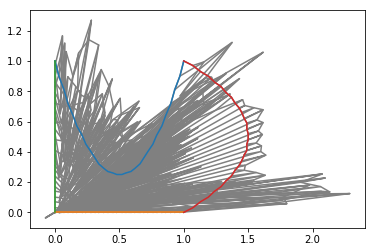

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f = open('swan.txt','rt')

nx = int(f.readline())
rt = np.zeros((nx,2))
for i in range(nx):
    l=f.readline()
    rt[i,0]=l.split(' ')[0]
    rt[i,1]=l.split(' ')[1]

n2 = int(f.readline())

if (n2 != nx):
    print("top and botton discretization should match")
    sys.exit(0)

rb = np.zeros((nx,2))
for i in range(nx):
    l=f.readline()
    rb[i,0]=l.split(' ')[0]
    rb[i,1]=l.split(' ')[1]

ny = int(f.readline())
rl = np.zeros((ny,2))
for i in range(ny):
    l=f.readline()
    rl[i,0]=l.split(' ')[0]
    rl[i,1]=l.split(' ')[1]

n2 = int(f.readline())

if (n2 != ny):
    print("left and right discretization should match")
    sys.exit(0)

rr = np.zeros((ny,2))
for i in range(ny):
    l=f.readline()
    rr[i,0]=l.split(' ')[0]
    rr[i,1]=l.split(' ')[1]

f.close()

gridx = np.zeros((ny,nx))
gridy = np.zeros((ny,nx))

gridx[0,:]=rb[:,0]
gridx[ny-1,:]=rt[:,0]
gridx[:,0]=rl[:,0]
gridx[:,nx-1]=rr[:,0]

gridy[0,:]=rb[:,1]
gridy[ny-1,:]=rt[:,1]
gridy[:,0]=rl[:,1]
gridy[:,ny-1]=rr[:,1]

dx = 1.0/nx
dy = 1.0/ny
for j in range(1,ny-1):
    for i in range(1,nx-1):
        idx = i*dx
        jdy = j*dy
        gridx[j,i] = (1.0-idx)*rl[j,0] + idx*rr[j,0] + (1.0 - jdy)*rb[i,0] + jdy*rt[i,0] - (1.0-idx)*(1.0-jdy)*rb[0,0] - (1.0 - idx)*jdy*rt[0,0] - idx*(1.0-jdy)*rb[nx-1,0] - idx*jdy*rt[nx-1,0]
        gridy[j,i] = (1.0-idx)*rl[j,1] + idx*rr[j,1] + (1.0 - jdy)*rb[i,1] + jdy*rt[i,1] - (1.0-idx)*(1.0-jdy)*rb[0,1] - (1.0 - idx)*jdy*rt[0,1] - idx*(1.0-jdy)*rb[nx-1,1] - idx*jdy*rt[nx-1,1]

dxi = 1.0/nx
deta = 1.0/ny
N = 100
for k in range(N):
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            dxdxi = (gridx[j,i+1]-gridx[j,i-1])/(2.0*dxi)
            dydxi = (gridy[j,i+1]-gridy[j,i-1])/(2.0*dxi)
            dxdeta = (gridx[j+1,i]-gridx[j-1,i])/(2.0*deta)
            dydeta = (gridy[j+1,i]-gridy[j-1,i])/(2.0*deta)       
            g11 = dxdxi**2 + dydxi**2
            g22 = dxdeta**2 + dydeta**2
            g12 = dxdxi*dxdeta + dydxi*dydeta
            a = 4.0*(deta**2)*g22
            b = 4.0*dxi*deta*g12
            c = 4.0*(dxi**2)*g11
            gridx[j,i] = (1.0/(2*(a+c)))*(a*(gridx[j,i+1]+gridx[j,i-1])+c*(gridx[j+1,i]+gridx[j-1,i])-0.5*(b*(gridx[j+1,i+1]+gridx[j-1,i-1]+gridx[j+1,i-1]+gridx[j-1,i+1])))
            gridy[j,i] = (1.0/(2*(a+c)))*(a*(gridy[j,i+1]+gridy[j,i-1])+c*(gridy[j+1,i]+gridy[j-1,i])-0.5*(b*(gridy[j+1,i+1]+gridy[j-1,i-1]+gridy[j+1,i-1]+gridy[j-1,i+1])))

for i in range(nx):
    plt.plot(gridx[i,:],gridy[i,:],color='gray')
for i in range(ny):
    plt.plot(gridx[:,i],gridy[:,i],color='gray')

plt.plot(rt[:,0],rt[:,1])
plt.plot(rb[:,0],rb[:,1])
plt.plot(rl[:,0],rl[:,1])
plt.plot(rr[:,0],rr[:,1])
plt.show()
